* Plot the time series, along with any logical or necessary differences to get a stationary dataset.
* Generate and interpret a PACF for the time series (and/or its differences).
* Generate five ARIMA specifications and evaluate their efficacy at modeling your data.
* Finally, choose one specification and make a case for it as a logical model for your dataset.


In [17]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import pacf

%matplotlib inline

In [2]:
data = pd.read_csv('/Users/jamesmoss/Documents/GitHub/Notes and Exercises/IndividualExercises/Week14/CPIAUCSL.csv')


In [9]:
data.head()

,DATE,CPIAUCSL
DATE,,
1947-01-01,1947-01-01,21.48
1947-02-01,1947-02-01,21.62
1947-03-01,1947-03-01,22.00
1947-04-01,1947-04-01,22.00
1947-05-01,1947-05-01,21.95


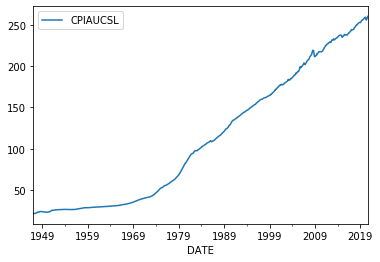

In [8]:
data.index = pd.to_datetime(data.DATE)
data.plot()
plt.show()

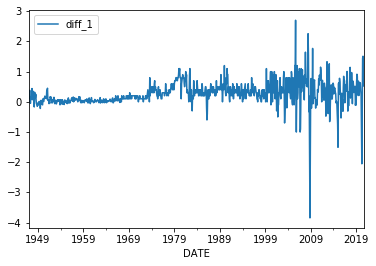

In [13]:
data['diff_1'] = data.CPIAUCSL - data.CPIAUCSL.shift()
data.plot(y='diff_1')


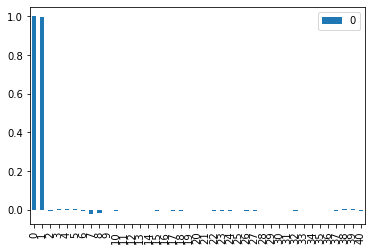

In [14]:
x_acf = pd.DataFrame(pacf(data.CPIAUCSL))
x_acf.plot(kind='bar')


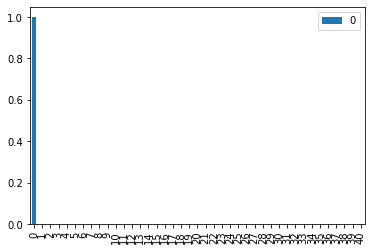

In [15]:
x_acf = pd.DataFrame(pacf(data.diff_1))
x_acf.plot(kind='bar')


In [20]:
model = ARIMA(data.CPIAUCSL, order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:             D.CPIAUCSL   No. Observations:                  884
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -443.914
Method:                           css   S.D. of innovations              0.400
Date:                Tue, 03 Nov 2020   AIC                            891.828
Time:                        16:41:47   BIC                            901.397
Sample:                    02-01-1947   HQIC                           895.487
                         - 09-01-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2701      0.013     20.083      0.000       0.244       0.296
count    8.840000e+02
mean     5.260308e-09
std      4.000334e-01
min     -4.112055e+00
25%     -2.100554e-01
50%     -7.005542e-02

/Users/jamesmoss/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jamesmoss/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [22]:
model = ARIMA(data.CPIAUCSL, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:               CPIAUCSL   No. Observations:                  885
Model:                     ARMA(1, 0)   Log Likelihood                -620.599
Method:                       css-mle   S.D. of innovations              0.482
Date:                Tue, 03 Nov 2020   AIC                           1247.198
Time:                        16:42:25   BIC                           1261.555
Sample:                    01-01-1947   HQIC                          1252.687
                         - 09-01-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            137.1223        nan        nan        nan         nan         nan
ar.L1.CPIAUCSL     1.0000        nan        nan        nan         nan         nan
                                    

/Users/jamesmoss/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jamesmoss/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/Users/jamesmoss/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/jamesmoss/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/jamesmoss/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [25]:
model = ARIMA(data.diff_1.dropna(), order=(1,0,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                 diff_1   No. Observations:                  884
Model:                     ARMA(1, 1)   Log Likelihood                -288.645
Method:                       css-mle   S.D. of innovations              0.335
Date:                Tue, 03 Nov 2020   AIC                            585.290
Time:                        16:43:23   BIC                            604.427
Sample:                    02-01-1947   HQIC                           592.607
                         - 09-01-2020                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2700      0.022     12.417      0.000       0.227       0.313
ar.L1.diff_1     0.3453      0.054      6.354      0.000       0.239       0.452
ma.L1.diff_1     0.2633      0.055      4.80

/Users/jamesmoss/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [26]:
model = ARIMA(data.CPIAUCSL, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:             D.CPIAUCSL   No. Observations:                  884
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -288.645
Method:                       css-mle   S.D. of innovations              0.335
Date:                Tue, 03 Nov 2020   AIC                            585.290
Time:                        16:44:04   BIC                            604.427
Sample:                    02-01-1947   HQIC                           592.607
                         - 09-01-2020                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2700      0.022     12.417      0.000       0.227       0.313
ar.L1.D.CPIAUCSL     0.3453      0.054      6.354      0.000       0.239       0.452
ma.L1.D.CPIAUCSL     0.2633 

/Users/jamesmoss/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jamesmoss/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [27]:
model = ARIMA(data.CPIAUCSL, order=(5,1,5))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/Users/jamesmoss/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jamesmoss/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:             D.CPIAUCSL   No. Observations:                  884
Model:                 ARIMA(5, 1, 5)   Log Likelihood                -256.040
Method:                       css-mle   S.D. of innovations              0.323
Date:                Tue, 03 Nov 2020   AIC                            536.081
Time:                        16:44:30   BIC                            593.494
Sample:                    02-01-1947   HQIC                           558.032
                         - 09-01-2020                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2574      0.089      2.898      0.004       0.083       0.431
ar.L1.D.CPIAUCSL     1.1413      0.290      3.932      0.000       0.572       1.710
ar.L2.D.CPIAUCSL    -0.9515 

Our last model has a log likelihood closest to 0, so you might expect that to be the best one. However, the mean residual is higher. The nature of inflation expectations is that the moving average part is extremely important. 